<a href="https://colab.research.google.com/github/robindoering86/Project2-Kickstarter_success/blob/master/Kickstarter_Project_Success_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3. Kickstarter Project Success - Robin & Peter, Manuel & Simon


In recent years, the range of funding options for projects created by individuals and small companies has expanded considerably. In addition to savings, bank loans, friends & family funding and other traditional options, crowdfunding has become a popular and readily available alternative. 

Kickstarter, founded in 2009, is one particularly well-known and popular crowdfunding platform. It has an all-or-nothing funding model, whereby a project is only funded if it meets its goal amount; otherwise no money is given by backers to a project.
A huge variety of factors contribute to the success or failure of a project — in general, and also on Kickstarter. Some of these are able to be quantified or categorized, which allows for the construction of a model to attempt to predict whether a project will succeed or not. The aim of this project is to construct such a model and also to analyse Kickstarter project data more generally, in order to help potential project creators assess whether or not Kickstarter is a good funding option for them, and what their chances of success are.


# Project 2: Kickstarter Project Success

## Import libraries

In [0]:
# Pandas as NumPy
import pandas as pd
import numpy as np

# Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, roc_curve, confusion_matrix 

# Pyplot
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split


# Others
from os import listdir
import time


## Read in the data

In [0]:
#from google.colab import drive
#drive.mount('/content/drive')

In [0]:
# For local execution
#base_path = './data/'

# For google colab execution
#base_path = '/content/drive/My Drive/Colab Notebooks/data/' # peter
base_path = 'data/'
#base_path = '/content/drive/My Drive/Kickstarter_data/data/' # robin
data = pd.concat([pd.read_csv(base_path+x) for x in sorted(listdir(base_path))], axis=0)
data_cp = data.copy()

In [0]:
# Create df for the second half of colu,ns
data_sh = data.iloc[:, 17:]

In [0]:
data.shape

(209222, 37)

In [0]:
data.isna().sum()

backers_count                    0
blurb                            8
category                         0
converted_pledged_amount         0
country                          0
created_at                       0
creator                          0
currency                         0
currency_symbol                  0
currency_trailing_code           0
current_currency                 0
deadline                         0
disable_communication            0
friends                     208922
fx_rate                          0
goal                             0
id                               0
is_backing                  208922
is_starrable                     0
is_starred                  208922
launched_at                      0
location                       226
name                             0
permissions                 208922
photo                            0
pledged                          0
profile                          0
slug                             0
source_url          

In [0]:
data.columns

Index(['backers_count', 'blurb', 'category', 'converted_pledged_amount',
       'country', 'created_at', 'creator', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline',
       'disable_communication', 'friends', 'fx_rate', 'goal', 'id',
       'is_backing', 'is_starrable', 'is_starred', 'launched_at', 'location',
       'name', 'permissions', 'photo', 'pledged', 'profile', 'slug',
       'source_url', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_pledged', 'usd_type'],
      dtype='object')

In [0]:
data.describe()

,backers_count,converted_pledged_amount,created_at,deadline,fx_rate,goal,id,launched_at,pledged,state_changed_at,static_usd_rate,usd_pledged
count,209222.000000,2.092220e+05,2.092220e+05,2.092220e+05,209222.000000,2.092220e+05,2.092220e+05,2.092220e+05,2.092220e+05,2.092220e+05,209222.000000,2.092220e+05
mean,145.419057,1.289290e+04,1.456089e+09,1.463033e+09,0.994857,4.917604e+04,1.073222e+09,1.460206e+09,1.881403e+04,1.462838e+09,1.010757,1.289213e+04
std,885.967976,8.889414e+04,6.339711e+07,6.305618e+07,0.211654,1.179427e+06,6.198051e+08,6.309029e+07,3.229596e+05,6.290421e+07,0.231893,8.890124e+04
min,0.000000,0.000000e+00,1.240366e+09,1.241334e+09,0.008966,1.000000e-02,8.624000e+03,1.240603e+09,0.000000e+00,1.241334e+09,0.008771,0.000000e+00
25%,4.000000,1.060000e+02,1.413317e+09,1.420607e+09,1.000000,1.500000e+03,5.351054e+08,1.417639e+09,1.100000e+02,1.420485e+09,1.000000,1.060014e+02
50%,27.000000,1.537000e+03,1.457895e+09,1.464754e+09,1.000000,5.000000e+03,1.074579e+09,1.461924e+09,1.556000e+03,1.464709e+09,1.000000,1.537358e+03
75%,89.000000,6.548000e+03,1.511595e+09,1.519437e+09,1.000000,1.500000e+04,1.609369e+09,1.516694e+09,6.887200e+03,1.519366e+09,1.000000,6.550000e+03
max,105857.000000,8.596474e+06,1.552527e+09,1.557721e+09,1.876033,1.000000e+08,2.147476e+09,1.552537e+09,8.103074e+07,1.552537e+09,1.716408,8.596475e+06


Description of columns would be helpful!

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209222 entries, 0 to 964
Data columns (total 37 columns):
backers_count               209222 non-null int64
blurb                       209214 non-null object
category                    209222 non-null object
converted_pledged_amount    209222 non-null int64
country                     209222 non-null object
created_at                  209222 non-null int64
creator                     209222 non-null object
currency                    209222 non-null object
currency_symbol             209222 non-null object
currency_trailing_code      209222 non-null bool
current_currency            209222 non-null object
deadline                    209222 non-null int64
disable_communication       209222 non-null bool
friends                     300 non-null object
fx_rate                     209222 non-null float64
goal                        209222 non-null float64
id                          209222 non-null int64
is_backing                  300 non

In [0]:
# significant amout of missing data in these columns, ignore for now
# Define a list columns to drop
droplist = []
droplist = droplist+['friends', 'is_backing', 'is_starred', 'permissions']

### The predicted variable: 'state'

In [0]:
data_sh['state'].describe()

count         209222
unique             5
top       successful
freq          117465
Name: state, dtype: object

In [0]:
data_sh['state'].value_counts()

successful    117465
failed         75199
canceled        8624
live            7311
suspended        623
Name: state, dtype: int64

In [0]:
# Calculate percentage of 'state' value that are not either 'successful' or 'failed'
abs(len(data_sh[(data_sh['state'] == 'successful') | (data_sh['state'] == 'failed')]) - len(data_sh)) / len(data_sh)

0.07914081693129786

'state' has 5 different values: 'successful', 'failed', 'canceled', 'live', and 'suspended'. If we want binary target class to be binary, we would loose approx 8% of the dataset.

In [0]:
data_sh[(data_sh['state'] == 'successful') | (data_sh['state'] == 'failed')].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192664 entries, 0 to 964
Data columns (total 20 columns):
is_backing          0 non-null object
is_starrable        192664 non-null bool
is_starred          0 non-null object
launched_at         192664 non-null int64
location            192449 non-null object
name                192664 non-null object
permissions         0 non-null object
photo               192664 non-null object
pledged             192664 non-null float64
profile             192664 non-null object
slug                192664 non-null object
source_url          192664 non-null object
spotlight           192664 non-null bool
staff_pick          192664 non-null bool
state               192664 non-null object
state_changed_at    192664 non-null int64
static_usd_rate     192664 non-null float64
urls                192664 non-null object
usd_pledged         192664 non-null float64
usd_type            192626 non-null object
dtypes: bool(3), float64(3), int64(2), object(12)
me

In [0]:
# New dataframe which contains only entries which have the state 'successful' or 'failed'
filtered_df = data[(data['state'] == 'successful') | (data['state'] == 'failed')].copy()
filtered_df.reset_index(inplace=True)

In [0]:
filtered_df.columns

Index(['index', 'backers_count', 'blurb', 'category',
       'converted_pledged_amount', 'country', 'created_at', 'creator',
       'currency', 'currency_symbol', 'currency_trailing_code',
       'current_currency', 'deadline', 'disable_communication', 'friends',
       'fx_rate', 'goal', 'id', 'is_backing', 'is_starrable', 'is_starred',
       'launched_at', 'location', 'name', 'permissions', 'photo', 'pledged',
       'profile', 'slug', 'source_url', 'spotlight', 'staff_pick', 'state',
       'state_changed_at', 'static_usd_rate', 'urls', 'usd_pledged',
       'usd_type'],
      dtype='object')

### The 'is_starrable' column
is_starrable - whether or not a project can be starred (liked and saved) by users

In [0]:
col = 'is_starrable'

In [0]:
filtered_df[col].head()

0    False
1    False
2    False
3    False
4    False
Name: is_starrable, dtype: bool

In [0]:
filtered_df[col] = filtered_df[col].astype(bool)

In [0]:
filtered_df[col].describe()

count     192664
unique         1
top        False
freq      192664
Name: is_starrable, dtype: object

In [0]:
filtered_df[col].value_counts()

False    192664
Name: is_starrable, dtype: int64

In [0]:
# Any missing values?
filtered_df[col].isnull().sum()

0

### The 'launched_at' column

launched_at - date and time of when the project was launched for funding

In [0]:
col = 'launched_at'
filtered_df[col].head()

0    1388011046
1    1550073611
2    1478012330
3    1540684582
4    1425919017
Name: launched_at, dtype: int64

In [0]:
# Make human-readable dates out of timestamp
filtered_df[col] = pd.to_datetime(filtered_df[col], unit='s')

In [0]:
#data_sh['launched_at'].iloc[0].dayofweek

filtered_df['launch_weekday'] = [x.day_name() for x in filtered_df['launched_at']]
filtered_df['launch_weekday'] = filtered_df['launch_weekday'].astype(str)
filtered_df['launch_weekday'].dtype

dtype('O')

In [0]:
filtered_df['launch_year'] = [x.year for x in filtered_df['launched_at']]
filtered_df['launch_year'] = filtered_df['launch_year'].astype(int)
filtered_df['launch_year'].dtype

dtype('int64')

In [0]:
filtered_df['launch_month'] = [x.month for x in filtered_df['launched_at']]
filtered_df['launch_month'] = filtered_df['launch_month'].astype(int)
filtered_df['launch_month'].dtype

dtype('int64')

In [0]:
filtered_df['launch_day'] = [x.day for x in filtered_df['launched_at']]
filtered_df['launch_day'] = filtered_df['launch_day'].astype(int)
filtered_df['launch_day'].dtype

dtype('int64')

In [0]:
# Create a new column for launch hour
filtered_df['launch_hour'] = [x.hour for x in filtered_df['launched_at']]
filtered_df['launch_hour'] = filtered_df['launch_hour'].astype(int)
filtered_df['launch_hour'].dtype

dtype('int64')

In [0]:
# TODO: Create bins for launch time

In [0]:
# Compare launch hour of successfull and failed projects
#plt.hist(filtered_df[filtered_df['state'] == 'successful']['hour'], bins=12, alpha=0.6)
#plt.hist(filtered_df[filtered_df['state'] == 'failed']['hour'], bins=12, alpha=0.6, color='r')

In [0]:
filtered_df['year'].unique()

KeyError: 'year'

In [0]:
# TODO: check whether launch time has changed over years, see whether it changes over the months

### The 'location' column

In [0]:
col = 'location'

filtered_df[col].dtype

In [0]:
filtered_df[col].head(10)

Looks like str representantion of a dictionary, turn into dict first.

In [0]:
#start =time.time()
del_idx = []
count = 0

for idx, x in enumerate(filtered_df[col]):

    try:
        filtered_df.at[idx, col] = eval(x.replace('false', 'False').replace('true', 'True').replace('null', 'None'))
        #eval(x.replace('false', 'False').replace('true', 'True').replace('null', 'None'))

    except:
        filtered_df.drop(idx, axis=0, inplace=True)
        del_idx.append(idx)
#end = time.time()
#print(end-start)
filtered_df.reset_index(inplace=True)

In [0]:
filtered_df[col][0]

In [0]:
# Count number of unique locations

#len(set([x['name'] for x in filtered_df[col]]))

filtered_df['city'] = [x['name'] for x in filtered_df[col]]

In [0]:
# Top 20 cities by project frequency

filtered_df['city'].value_counts().head(20).plot(kind='bar')

In [0]:
# Top 20 non-US cities

filtered_df['city'][filtered_df['location']['country'] != 'US'].value_counts().head(20).plot(kind='bar')

In [0]:
filtered_df['location'][0]['country']

In [0]:
plt.figure(figsize=(15,7))
data['country'].value_counts().plot(kind='bar')

### The 'name' column

In [0]:
col = 'name'
filtered_df[col].describe()

In [0]:
filtered_df[[col]].isna().sum()

No missing values but apparently 24000 non-unique entries / names. This certainly requires further addressing.

In [0]:
# Look at the distribution of project name lengths
plt.hist([len(x) for x in filtered_df[col]], bins=30)

In [0]:
# Look into:
# lenght of name vs successful / failed funding
# sentiment analysis vs. funding success

### The 'photo' column

In [0]:
col = 'photo'
filtered_df[col].describe()

In [0]:
filtered_df[col].head()

Another column that looks like str reprensentation of a dict

In [0]:
filtered_df[col].isna().sum()

In [0]:
eval(filtered_df[col][0])['1536x864']

In [0]:
# Turn strings into dicts and check for exceptions errors

del_idx = []
count = 0
for idx, x in enumerate(filtered_df[col]):

    try:
        filtered_df.at[idx, col] = eval(x.replace('false', 'False').replace('true', 'True').replace('null', 'None'))
        #eval(x.replace('null', 'None'))
    except:
        count += 1
        del_idx.append(idx)
print(count)

TODO: Analyse 'photos'

### The 'pledged' column

pledged data is given in native currencies. **So can be dropped in favour of 'usd_pledged' which gives pledged amount in same currency (USD)**

In [0]:
col = 'pledged'
filtered_df[col].dtypes

In [0]:
filtered_df[col].describe()

In [0]:
filtered_df[col].isna().sum()

No missing values 

In [0]:
filtered_df[col].value_counts()


2018-02-27 17:50:20    4
2018-08-14 15:00:02    4
2018-02-19 17:02:12    4
2018-09-25 16:00:01    4
2018-10-15 14:00:01    4
2019-01-31 17:00:07    4
2018-11-13 17:00:21    4
2018-09-24 16:00:02    4
2018-10-17 15:59:30    4
2018-12-03 17:00:06    4
2018-10-23 14:51:54    4
2019-02-05 15:00:14    4
2018-05-16 18:55:59    4
2017-06-12 15:59:10    4
2018-11-12 15:06:08    4
2016-11-01 14:02:40    4
2018-09-07 18:49:35    4
2018-11-01 15:52:41    4
2019-01-08 15:00:04    4
2018-09-04 18:01:20    4
2019-02-21 20:00:01    4
2018-11-26 17:30:30    3
2018-06-12 16:04:59    3
2017-01-24 01:00:06    3
2016-09-06 19:49:38    3
2018-05-23 14:56:18    3
2018-10-10 14:58:06    3
2018-10-02 11:05:11    3
2017-11-15 23:29:31    3
2014-07-29 17:13:31    3
                      ..
2017-09-28 08:02:13    1
2017-10-30 12:45:11    1
2014-12-15 17:02:46    1
2014-12-28 04:21:11    1
2017-11-19 12:28:10    1
2012-06-11 20:08:26    1
2018-10-12 20:28:01    1
2015-02-05 10:33:34    1
2015-10-01 01:36:36    1


15003 projects that pledged 0 USD?

In [0]:
droplist.append(col)
#filtered_df.drop('pledged', inplace=True, axis=1)

### The 'profile' column

In [0]:
col = 'profile'

filtered_df[col].head()

0    {"id":822687,"project_id":822687,"state":"inac...
1    {"id":3665299,"project_id":3665299,"state":"in...
2    {"id":2730508,"project_id":2730508,"state":"in...
3    {"id":3498742,"project_id":3498742,"state":"ac...
4    {"id":1754403,"project_id":1754403,"state":"in...
Name: profile, dtype: object

Yet another column with str reprensentation of a dict. Lets look into one entry:

In [0]:
entry = eval(filtered_df[col][0].replace('null', 'None').replace('false', 'False').replace('true', 'True'))
entry

{'id': 822687,
 'project_id': 822687,
 'state': 'inactive',
 'state_changed_at': 1425915845,
 'name': None,
 'blurb': None,
 'background_color': None,
 'text_color': None,
 'link_background_color': None,
 'link_text_color': None,
 'link_text': None,
 'link_url': None,
 'show_feature_image': False,
 'background_image_opacity': 0.8,
 'should_show_feature_image_section': True,
 'feature_image_attributes': {'image_urls': {'default': 'https://ksr-ugc.imgix.net/assets/011/625/534/5bea1760d7f20943c4cd5e9b4911c1bd_original.jpg?ixlib=rb-1.1.0&crop=faces&w=1552&h=873&fit=crop&v=1463685705&auto=format&frame=1&q=92&s=90c72b785ef97539099dffb8531dcad3',
   'baseball_card': 'https://ksr-ugc.imgix.net/assets/011/625/534/5bea1760d7f20943c4cd5e9b4911c1bd_original.jpg?ixlib=rb-1.1.0&crop=faces&w=560&h=315&fit=crop&v=1463685705&auto=format&frame=1&q=92&s=883b3ff098e5fc4cf6fec280665f5fd0'}}}

In [0]:
list(entry.keys())

['id',
 'project_id',
 'state',
 'state_changed_at',
 'name',
 'blurb',
 'background_color',
 'text_color',
 'link_background_color',
 'link_text_color',
 'link_text',
 'link_url',
 'show_feature_image',
 'background_image_opacity',
 'should_show_feature_image_section',
 'feature_image_attributes']

In [0]:
# Check which of the entries of the 'profile' column already exist as separate column s

for e in list(data.columns):
    if e in list(entry.keys()):
        print(e)

blurb
id
name
state
state_changed_at


In [0]:
## TODO: Check whether contents also match

Seems like a repetition of other columns. And some additional information. Well drop the column for now.

In [0]:
droplist.append(col)

### The 'slug' column

In [0]:
col = 'slug'
filtered_df[col].head()

0                                new-final-round-album
1                      princess-pals-enamel-pin-series
2    their-life-through-their-lens-the-amish-and-me...
3                             wao-the-eco-effect-shoes
4                       apple-watch-development-course
Name: slug, dtype: object

In [0]:
filtered_df['name'].head()

0                                New Final Round Album
1                      Princess Pals Enamel Pin Series
2    Their Life Through Their Lens-the Amish and Me...
3                            WAO: THE ECO EFFECT SHOES
4                       Apple Watch Development Course
Name: name, dtype: object

At first glance, this looks like the 'name' column in all lower case and with hyphens instead of whitespaces.

In [0]:
filtered_df[col].describe()

count                        192664
unique                       168979
top       super-martinez-bros-scarf
freq                              2
Name: slug, dtype: object

In [0]:
[filtered_df['name'].str.lower().replace(' ', '-').replace(':', '') == filtered_df[col]]

[0         False
 1         False
 2         False
 3         False
 4         False
 5         False
 6         False
 7         False
 8         False
 9          True
 10        False
 11        False
 12        False
 13         True
 14        False
 15        False
 16        False
 17        False
 18        False
 19        False
 20        False
 21        False
 22        False
 23        False
 24        False
 25        False
 26        False
 27        False
 28        False
 29        False
           ...  
 192634    False
 192635    False
 192636    False
 192637    False
 192638    False
 192639    False
 192640    False
 192641    False
 192642    False
 192643    False
 192644    False
 192645    False
 192646    False
 192647    False
 192648    False
 192649    False
 192650    False
 192651    False
 192652    False
 192653    False
 192654    False
 192655    False
 192656    False
 192657    False
 192658    False
 192659    False
 192660    False
 192661    Fal

In [0]:
li = []
for i in range(10):
    
    li.append(filtered_df['name'][i].lower().replace(' ', '-').replace(':', '') == filtered_df['slug'][i])
    

In [0]:
filtered_df[col].str.len().max()

121

In [0]:
filtered_df[col][2]

'their-life-through-their-lens-the-amish-and-mennon'

In [0]:
filtered_df['name'][2].lower().replace(' ', '-').replace(':', '')

'their-life-through-their-lens-the-amish-and-mennonite-people'

In [0]:
filtered_df[col].str.lower().replace(' ', '-').replace(':', '')

0                                     new-final-round-album
1                           princess-pals-enamel-pin-series
2         their-life-through-their-lens-the-amish-and-me...
3                                  wao-the-eco-effect-shoes
4                            apple-watch-development-course
5                                   saluki-totem-enamel-pin
6                                 quickstarter-tao-of-maceo
7                lolnub-web-theme-park-and-story-attraction
8                  limited-edition-heroic-fireman-statuette
9                                                   prattle
10                  end-of-an-era-if-these-walls-could-talk
11        line-in-the-sand-stories-from-the-northern-gat...
12        avalon-nero-handcrafted-prestige-mens-shoes-lo...
13                                                  nakefit
14                       war-of-dragons-fight-to-the-finish
15                japanese-burger-anime-cafe-gabutto-burger
16               pacific-crest-trail-a-p

droplist.append(col)

### The 'source_url' column

In [0]:
col = 'source_url'
filtered_df[col][1000]

'https://www.kickstarter.com/discover/categories/technology/software'

This is just an url to the category of the project, drop.

In [0]:
droplist.append(col)

### The 'staff_pick' column

staff_pick - whether a project was highlighted as a staff_pick when it was launched/live

Seems like an interesting variable. 

In [0]:
col = 'staff_pick'

filtered_df[col].head()

0    False
1    False
2     True
3    False
4    False
Name: staff_pick, dtype: bool

In [0]:
filtered_df[col].value_counts()

False    166671
True      25993
Name: staff_pick, dtype: int64

In [0]:
round(25940/(25940+166509)*100, 2)

13.48

13.48 % of projects where highlighted as staff_pick, when they were launched/live.

### The 'state_changed_at' column
state_changed_at - date and time of when a project's status was changed (same as the deadline for successful and failed projects)

In [0]:
col = 'state_changed_at'

filtered_df[col].head()

0    1391899046
1    1551801611
2    1480607932
3    1544309940
4    1428511019
Name: state_changed_at, dtype: int64

In [0]:
# Conver to datetime object
filtered_df[col] = pd.to_datetime(filtered_df[col], unit='s')

### The 'static_usd_rate' column

static_usd_rate - conversion rate between the original currency and USD

In [0]:
col = 'static_usd_rate'

filtered_df[col].head()

0    1.000000
1    1.000000
2    1.000000
3    1.136525
4    1.000000
Name: static_usd_rate, dtype: float64

Assume column is just a mulitplier to convert 'pledge' to 'usd_plegded', drop.

In [0]:
droplist.append(col)

### The 'urls' columns
urls - url to the project's page

In [0]:
col = 'urls'

filtered_df[col].head()

0    {"web":{"project":"https://www.kickstarter.com...
1    {"web":{"project":"https://www.kickstarter.com...
2    {"web":{"project":"https://www.kickstarter.com...
3    {"web":{"project":"https://www.kickstarter.com...
4    {"web":{"project":"https://www.kickstarter.com...
Name: urls, dtype: object

In [0]:
eval(filtered_df[col][0])

{'web': {'project': 'https://www.kickstarter.com/projects/1495925645/new-final-round-album?ref=discovery_category_newest',
  'rewards': 'https://www.kickstarter.com/projects/1495925645/new-final-round-album/rewards'}}

Just links to the project page, drop.

In [0]:
droplist.append(col)

### The 'usd_pledged' column
usd_pledged - amount pledged in USD

In [0]:
col = 'usd_pledged'

filtered_df[col].head()

0      802.00000
1     2259.00000
2    29638.00000
3    49075.15252
4      549.00000
Name: usd_pledged, dtype: float64

In [0]:
filtered_df[col].describe()

count    1.926640e+05
mean     1.351672e+04
std      8.918397e+04
min      0.000000e+00
25%      1.500000e+02
50%      1.772000e+03
75%      7.096621e+03
max      8.596475e+06
Name: usd_pledged, dtype: float64

In [0]:
filtered_df[col].isna().sum()

0

In [0]:
filtered_df[col].value_counts()

0.000000e+00    15009
1.000000e+00     3561
1.000000e+01     1116
2.500000e+01      972
2.000000e+00      917
5.000000e+00      797
5.000000e+01      790
1.000000e+02      719
2.000000e+01      655
3.000000e+01      478
1.100000e+01      462
1.500000e+01      408
6.000000e+00      363
2.600000e+01      353
4.000000e+01      319
6.000000e+01      318
5.100000e+01      314
3.500000e+01      310
3.000000e+00      302
5.000000e+02      294
1.000000e+03      293
2.100000e+01      286
2.000000e+02      259
1.010000e+02      249
1.500000e+02      246
7.500000e+01      245
5.500000e+01      217
3.000000e+02      212
1.250000e+02      205
7.000000e+01      200
                ...  
4.639332e+05        1
7.390990e+03        1
2.536778e+04        1
5.060865e+03        1
1.566900e+04        1
1.213481e+03        1
3.256543e+04        1
5.429192e+04        1
1.229205e+04        1
2.352124e+04        1
3.349738e+04        1
2.534012e+01        1
4.488010e+03        1
8.835529e+03        1
1.086235e+

In [0]:
filtered_df[filtered_df[col] == np.float(0)]['state'].value_counts()

failed    15009
Name: state, dtype: int64

### The 'usd_type' column
usd_type - domestic or international

In [0]:
col = 'usd_type'

filtered_df[col].head()

0    international
1    international
2    international
3    international
4         domestic
Name: usd_type, dtype: object

In [0]:
filtered_df[col].unique()

array(['international', 'domestic', nan], dtype=object)

In [0]:
filtered_df[col].isna().sum()

38

38 missing values, but can be ignored as columns will be dropped anyways.

In [0]:
droplist.append(col)

In [0]:
droplist

['friends',
 'is_backing',
 'is_starred',
 'permissions',
 'launched_at',
 'profile',
 'source_url',
 'static_usd_rate',
 'urls',
 'usd_type']

In [0]:
filtered_df.shape

(192664, 43)

In [0]:
filtered_df.drop(droplist, axis=1, inplace=True)

In [0]:
filtered_df.shape

(192664, 33)

In [0]:
filtered_df.columns

Index(['index', 'backers_count', 'blurb', 'category',
       'converted_pledged_amount', 'country', 'created_at', 'creator',
       'currency', 'currency_symbol', 'currency_trailing_code',
       'current_currency', 'deadline', 'disable_communication', 'fx_rate',
       'goal', 'id', 'is_starrable', 'location', 'name', 'photo', 'pledged',
       'slug', 'spotlight', 'staff_pick', 'state', 'state_changed_at',
       'usd_pledged', 'launch_weekday', 'launch_year', 'launch_month',
       'launch_day', 'launch_hour'],
      dtype='object')

###The rest of the columns

In [0]:
# split creator column entry in sub_columns
df_tot = filtered_df
import json 
#df_creator = pd.DataFrame(json.loads(df_tot.creator.values))
creator_dlist = list()
idx_drop = list()
backup = None
#print(json.loads(df_tot.creator.values[0]))
count = 0
for idx, x in enumerate(df_tot.creator.values):
  try:
    creator_dlist.append(json.loads(x))
    #df_tot.creator.values[idx] = json.loads(x)
  except:
    # catches the other cases with the exception of 7 cases
    a = x.index("\"name\":")
    b = x.index("\"", a + 8)
    x = x[:b] + "'" + x[b + 1:]
    c = x.index("\"", b)
    x = x[:c] + "'" + x[c + 1:]
    try:
      creator_dlist.append(json.loads(x))
    except:
      print(a,b,c)
      count += 1
      idx_drop.append(idx)
print(count)
df_creator = pd.DataFrame(creator_dlist)
df_creator.columns = ['crea_' + x for x in df_creator.columns]
df_creator.info()
df_tot2 = df_tot.drop(idx_drop, axis = 0).reset_index()


16 65 67
16 32 50
16 65 67
17 33 36
17 43 57
5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192659 entries, 0 to 192658
Data columns (total 7 columns):
crea_avatar             192659 non-null object
crea_chosen_currency    0 non-null object
crea_id                 192659 non-null int64
crea_is_registered      0 non-null object
crea_name               192659 non-null object
crea_slug               57324 non-null object
crea_urls               192659 non-null object
dtypes: int64(1), object(6)
memory usage: 10.3+ MB


In [0]:
# drop two columns with only null entry
df_creator.drop(['crea_is_registered', 'crea_chosen_currency'], axis = 1, inplace = True)
df_creator.head()

,crea_avatar,crea_id,crea_name,crea_slug,crea_urls
0,{'thumb': 'https://ksr-ugc.imgix.net/assets/00...,1495925645,Daniel,NaN,{'web': {'user': 'https://www.kickstarter.com/...
1,{'thumb': 'https://ksr-ugc.imgix.net/assets/02...,1175589980,Katherine,freckleddisney,{'web': {'user': 'https://www.kickstarter.com/...
2,{'thumb': 'https://ksr-ugc.imgix.net/assets/01...,1196856269,MelissaThomas,NaN,{'web': {'user': 'https://www.kickstarter.com/...
3,{'thumb': 'https://ksr-ugc.imgix.net/assets/02...,1569700626,WAO,wearewao,{'web': {'user': 'https://www.kickstarter.com/...
4,{'thumb': 'https://ksr-ugc.imgix.net/assets/00...,1870845385,Kalpit Jain,NaN,{'web': {'user': 'https://www.kickstarter.com/...


In [0]:
category_dlist = list()
count = 0
for idx, x in enumerate(df_tot2.category.values):
  try:
    category_dlist.append(json.loads(x))
  except:
    count += 1

print(count)

df_category = pd.DataFrame(category_dlist)
df_category.columns = ['cat_' + x for x in df_category.columns]
df_category.info()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192659 entries, 0 to 192658
Data columns (total 7 columns):
cat_color        192659 non-null int64
cat_id           192659 non-null int64
cat_name         192659 non-null object
cat_parent_id    184383 non-null float64
cat_position     192659 non-null int64
cat_slug         192659 non-null object
cat_urls         192659 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 10.3+ MB


In [0]:
df_category.cat_name = df_category.cat_name.str.lower()
df_category.cat_name = df_category.cat_name.str.replace(" ", "_")
df_category.columns = ['cat_super' if x=='cat_slug' else x for x in df_category.columns]
df_category.cat_super = [str(x).split(sep = '/')[0] for x in df_category.cat_super.values]
df_category.cat_super = df_category.cat_super.replace(" ", "_")
df_category.tail()

,cat_color,cat_id,cat_name,cat_parent_id,cat_position,cat_super,cat_urls
192654,16725570,307,drinks,10.0,4,food,{'web': {'discover': 'http://www.kickstarter.c...
192655,16725570,306,cookbooks,10.0,3,food,{'web': {'discover': 'http://www.kickstarter.c...
192656,16752598,264,childrenswear,9.0,3,fashion,{'web': {'discover': 'http://www.kickstarter.c...
192657,14867664,46,children's_books,18.0,5,publishing,{'web': {'discover': 'http://www.kickstarter.c...
192658,16760235,23,painting,1.0,7,art,{'web': {'discover': 'http://www.kickstarter.c...


In [0]:
df_tot3 = pd.concat([df_tot2, df_creator, df_category],axis = 1)
df_tot3.drop(['creator', 'category'], inplace = True, axis = 1)
df_tot3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192659 entries, 0 to 192658
Data columns (total 44 columns):
level_0                     192659 non-null int64
index                       192659 non-null int64
backers_count               192659 non-null int64
blurb                       192657 non-null object
converted_pledged_amount    192659 non-null int64
country                     192659 non-null object
created_at                  192659 non-null int64
currency                    192659 non-null object
currency_symbol             192659 non-null object
currency_trailing_code      192659 non-null bool
current_currency            192659 non-null object
deadline                    192659 non-null int64
disable_communication       192659 non-null bool
fx_rate                     192659 non-null float64
goal                        192659 non-null float64
id                          192659 non-null int64
is_starrable                192659 non-null bool
location                    19244

In [0]:
df_tot3.created_at = pd.to_datetime(df_tot3.created_at, unit='s')
df_tot3.deadline = pd.to_datetime(df_tot3.deadline, unit='s')

In [0]:
df_tot3.id = df_tot3.id.astype('category')

In [0]:
df_tot3.blurb = df_tot3.blurb.fillna('')
df_tot3.blurb = df_tot3.blurb.astype(str)
blurb_wc = [len(str(x).lower().split()) for x in df_tot3.blurb]
blurb_un_words = [set(str(x).lower().split()) for x in df_tot3.blurb]
blurb_un_words = set.union(*blurb_un_words)
print(len(blurb_un_words))
print(set(blurb_wc))
df_tot3['blurb_wordcount'] = blurb_wc
#df_tot3[df_tot3.blurb.isna()]
# keyword analysis in blurb as bonus

211926
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35}


In [0]:
df_tot3.country = df_tot3.country.astype('category')
df_tot3.currency = df_tot3.currency.astype('category')
df_tot3.currency_symbol = df_tot3.currency_symbol.astype('category')
df_tot3.current_currency = df_tot3.current_currency.astype('category')

In [0]:
# deletes columns that contain only little information
#df_tot4 = df_tot3.drop(['friends', 'is_backing', 'is_starred', 'permissions'], axis = 1)
df_tot4 = df_tot3

In [0]:
df_tot4.crea_slug = df_tot4.crea_slug.fillna('')
df_tot4.cat_parent_id = df_tot4.cat_parent_id.fillna(0)

In [0]:
# list of project list according to unique ids
id_groupby = df_tot4.groupby('id')

id_groupby2 = id_groupby.size().reset_index(name='counts')
indexid = id_groupby2[id_groupby2.counts > 1].index
iddouble_list = id_groupby2[id_groupby2.counts > 1].id.unique()


In [0]:
double_entries_sublist = [df_tot4[df_tot4.id == x].index[1:] for x in iddouble_list]
double_entries_sublist_flat = list()
for y in double_entries_sublist:
  for x in y:
    double_entries_sublist_flat.append(x)
#double_entries_sublist_flat

In [0]:
df_tot5 = df_tot4.drop(double_entries_sublist_flat, axis = 0)

In [0]:
# list of project list of unique creator
unique_crea_set = set(df_tot5.crea_id.unique())
#crea_id_entry

creaid_groupby = df_tot5.groupby('crea_id')


creaid_groupby2 = creaid_groupby.size().reset_index(name='counts')
indexcreaid = creaid_groupby2[creaid_groupby2.counts > 1].index
creaiddouble_list = creaid_groupby2[creaid_groupby2.counts > 1].crea_id.unique()
# number of creators with x projects
multi_proj = list()
x_list = list()
for x in range(1,75):
  a = len(creaid_groupby2[creaid_groupby2.counts == x].crea_id.unique())
  multi_proj.append(a)
  x_list.append(x)
  #print(x, np.log10(a))

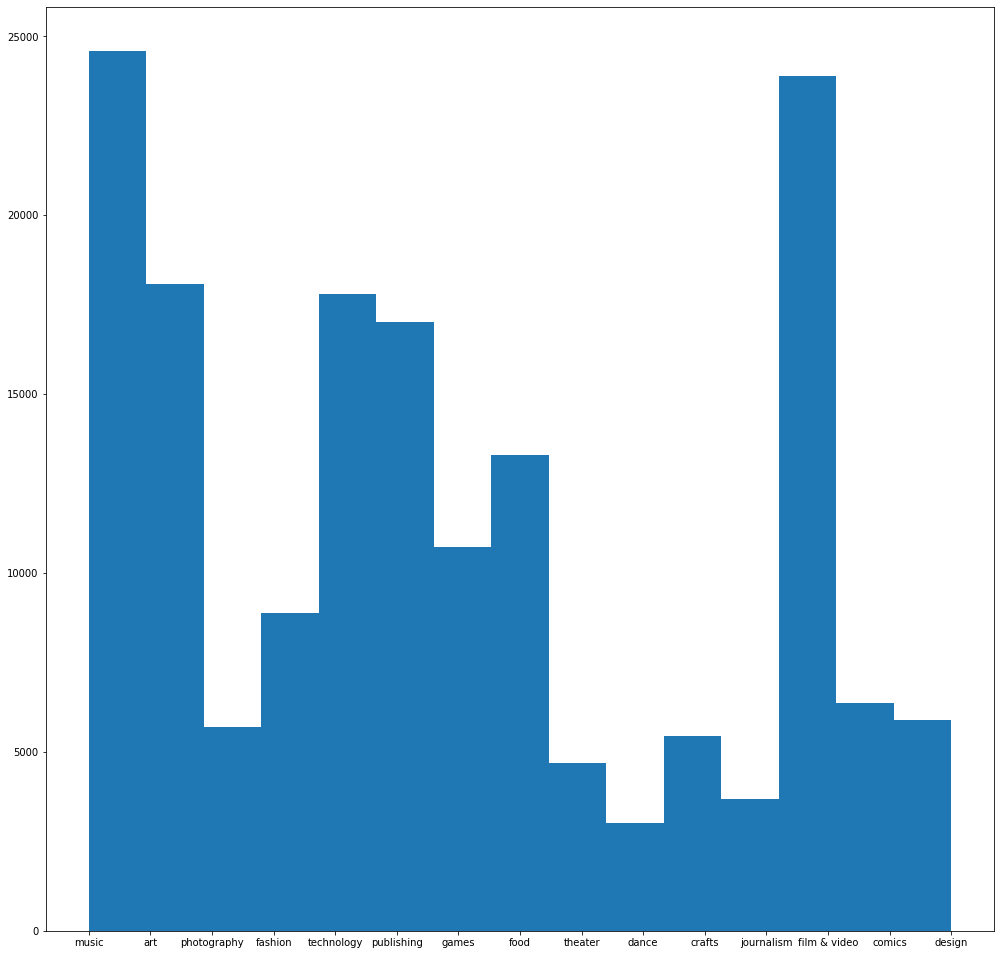

In [0]:
df_tot5.cat_super.hist(bins = len(df_tot5.cat_super.unique()), figsize = (17,17), grid = False)

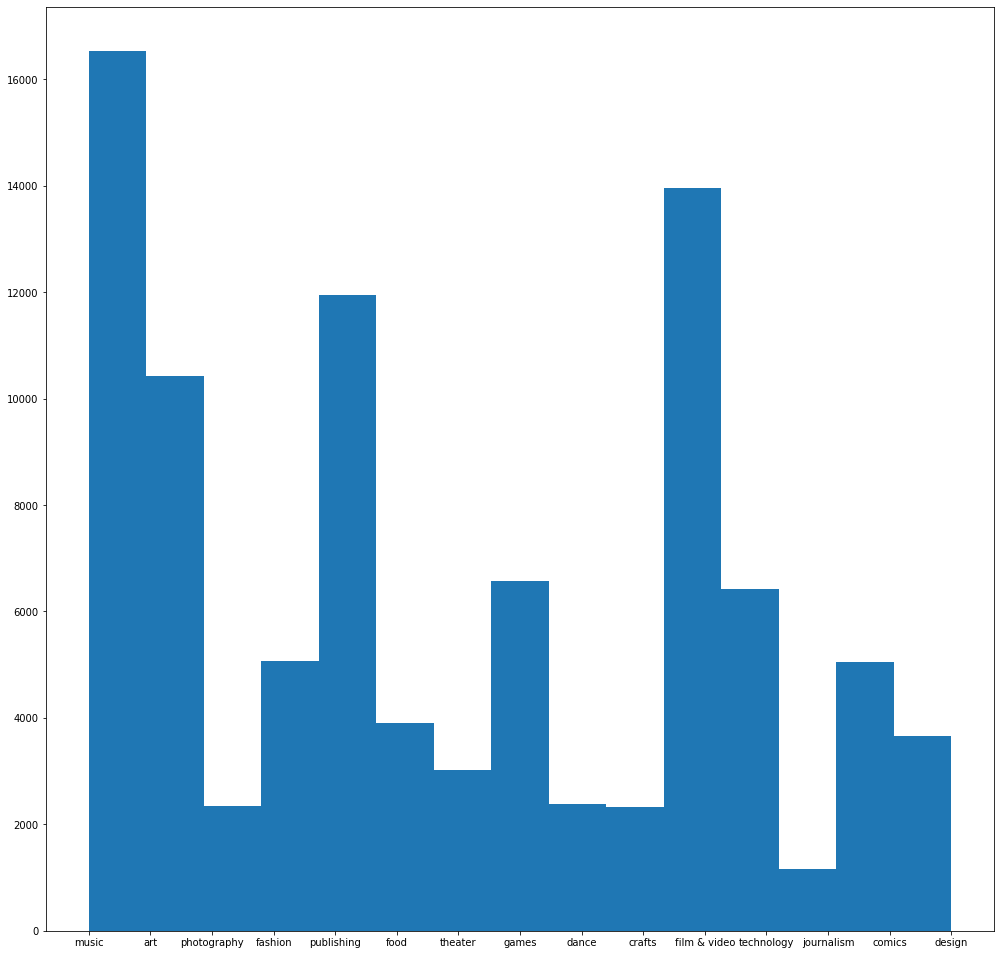

In [0]:
df_tot5[df_tot5.state == 'successful'].cat_super.hist(bins = len(df_tot5.cat_super.unique()), figsize = (17,17), grid = False)

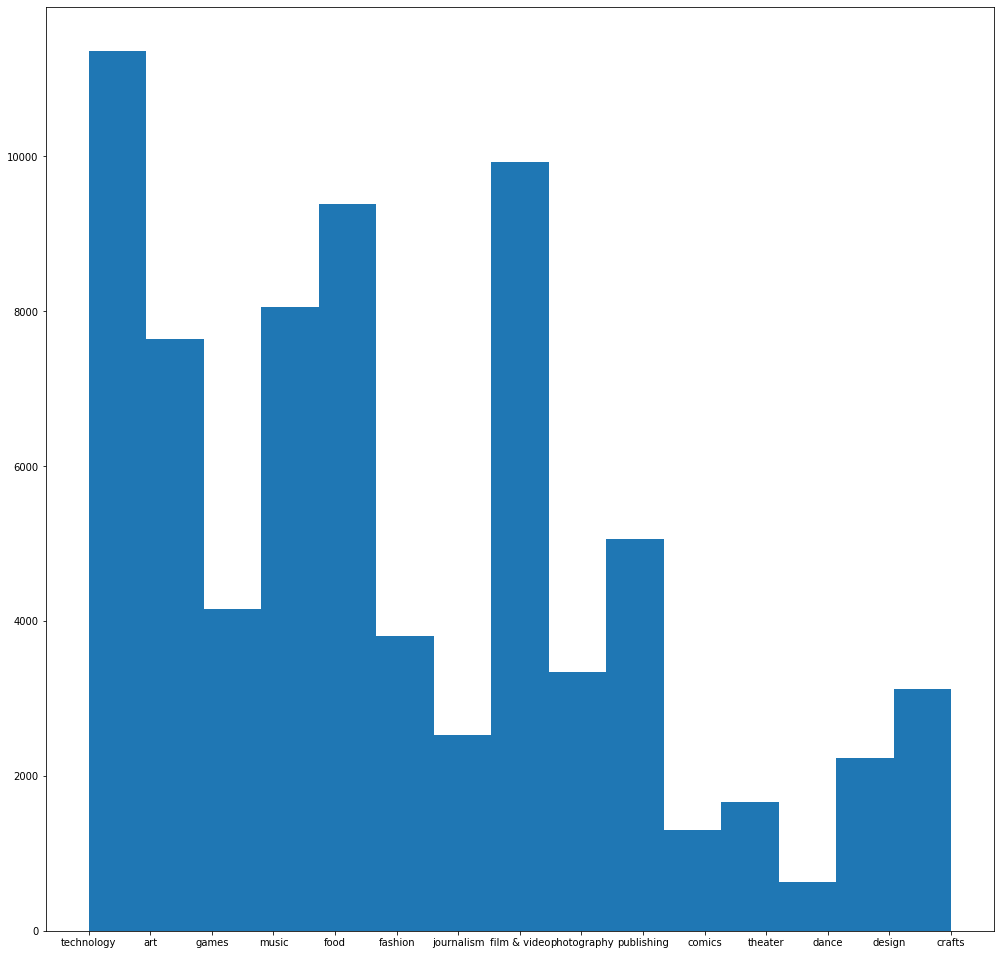

In [0]:
df_tot5[df_tot5.state == 'failed'].cat_super.hist(bins = len(df_tot5.cat_super.unique()), figsize = (17,17), grid = False)

In [0]:
init_month = [x.astype('datetime64[M]').astype(int) % 12 + 1 for x in df_tot5.created_at.values]
end_month = [x.astype('datetime64[M]').astype(int) % 12 + 1 for x in df_tot5.deadline.values]
init_year = [x.astype('datetime64[Y]').astype(int) + 1970 for x in df_tot5.created_at.values]
end_year = [x.astype('datetime64[Y]').astype(int) + 1970 for x in df_tot5.deadline.values]
init_month_succ = [x.astype('datetime64[M]').astype(int) % 12 + 1 for x in df_tot5[df_tot5.state == 'successful'].created_at.values]
end_month_succ = [x.astype('datetime64[M]').astype(int) % 12 + 1 for x in df_tot5[df_tot5.state == 'successful'].deadline.values]
init_year_succ = [x.astype('datetime64[Y]').astype(int) + 1970 for x in df_tot5[df_tot5.state == 'successful'].created_at.values]
end_year_succ = [x.astype('datetime64[Y]').astype(int) + 1970 for x in df_tot5[df_tot5.state == 'successful'].deadline.values]
print(df_tot5.created_at.values[1], df_tot5.created_at.values[1].astype('datetime64[M]').astype(int) % 12 + 1)
init_year[1]

2019-02-08T21:02:48.000000000 2


2019

(array([28707., 14956., 14210., 14729., 13663., 16350., 14547., 13921.,
        14453., 23439.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

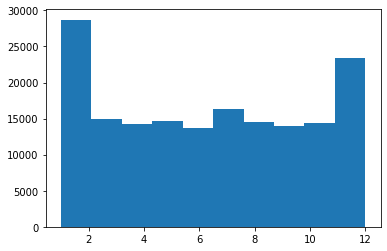

In [0]:
plt.hist(init_month)

(array([16505.,  8819.,  8133.,  8464.,  7521.,  8224.,  8039.,  7933.,
         8240., 12898.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

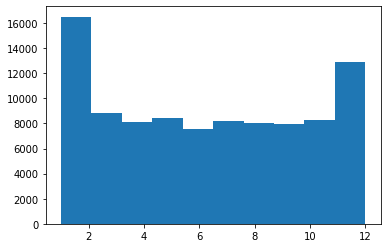

In [0]:
plt.hist(init_month_succ)

(array([22530., 15135., 13815., 14510., 14327., 14976., 15677., 13916.,
        14543., 29546.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

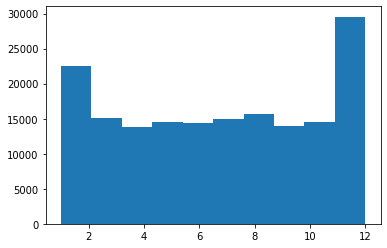

In [0]:
plt.hist(end_month)

(array([12250.,  8680.,  8070.,  8404.,  8152.,  8402.,  8240.,  7386.,
         8314., 16878.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

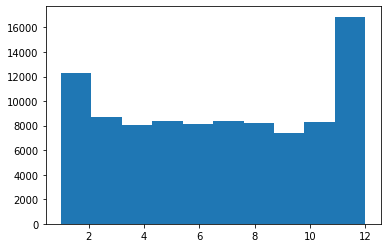

In [0]:
plt.hist(end_month_succ)

(array([  249.,  1467.,  4424.,  9684., 12025., 27361., 34191., 25992.,
        25767., 27815.]),
 array([2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.,
        2018., 2019.]),
 <a list of 10 Patch objects>)

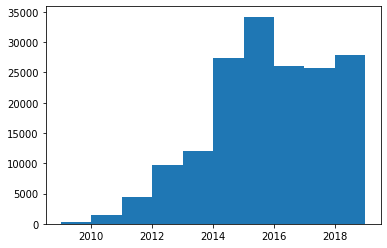

In [0]:
plt.hist(init_year)

(array([  202.,  1145.,  3482.,  7492.,  9322., 14080., 14893., 12647.,
        13288., 18225.]),
 array([2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.,
        2018., 2019.]),
 <a list of 10 Patch objects>)

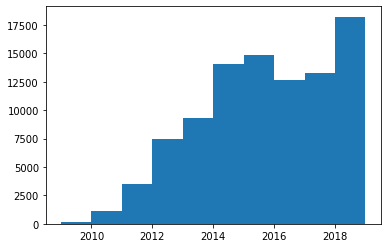

In [0]:
plt.hist(init_year_succ)

(array([  142.,  1226.,  3816.,  8352., 10875., 24369., 35100., 26795.,
        25872., 32428.]),
 array([2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.,
        2018., 2019.]),
 <a list of 10 Patch objects>)

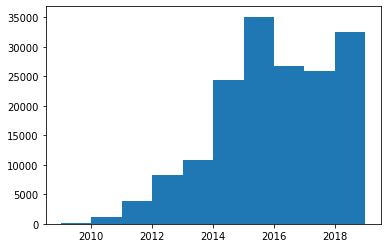

In [0]:
plt.hist(end_year)

(array([  118.,   950.,  3042.,  6511.,  8717., 13273., 15469., 12839.,
        12959., 20898.]),
 array([2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.,
        2018., 2019.]),
 <a list of 10 Patch objects>)

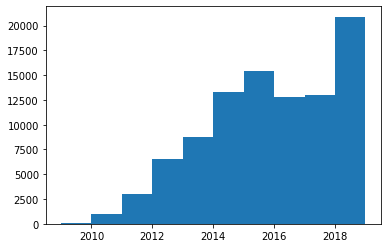

In [0]:
plt.hist(end_year_succ)

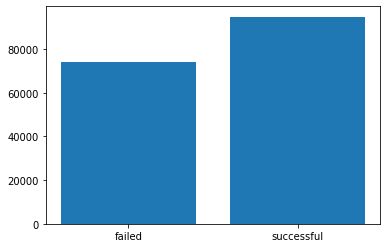

In [0]:
stategroupby = df_tot5.groupby('state').count().blurb
statedict = dict(stategroupby)
plt.bar(statedict.keys(), statedict.values());

In [0]:
!pip install gender-guesser
import gender_guesser.detector as gender

In [0]:
d = gender.Detector()
gender_list = list()
for x in df_tot5.crea_name.values:
  gender_list.append(d.get_gender(x.split()[0]))
gender_list
male_count = 0
mmale_count = 0
female_count = 0
mfemale_count = 0
unknown_count = 0
unclear_count = 0

for x in gender_list:
  if x == 'male':
    male_count += 1
  elif x == 'mostly_male':
    mmale_count += 1
  elif x == 'female':
    female_count += 1
  elif x == 'mostly_female':
    mfemale_count += 1
  elif x == 'unknown':
    unknown_count += 1
  else:
    unclear_count += 1
print(male_count, mmale_count, female_count, mfemale_count, unknown_count, unclear_count)
for idx, x in enumerate(gender_list):
  if x == 'mostly_male':
    gender_list[idx] = 'male'
  elif x == 'mostly_female':
    gender_list[idx] = 'female'
  elif x == 'andy':
    gender_list[idx] = 'unknown'

68970 6643 30247 6488 54938 1689


In [0]:
df_tot5['gender'] = gender_list

In [0]:
df_tot5.describe()

,level_0,index,backers_count,converted_pledged_amount,fx_rate,goal,pledged,usd_pledged,launch_year,launch_month,launch_day,launch_hour,crea_id,cat_color,cat_id,cat_parent_id,cat_position,blurb_wordcount
count,168975.000000,168975.000000,168975.000000,1.689750e+05,168975.000000,1.689750e+05,1.689750e+05,1.689750e+05,168975.000000,168975.000000,168975.000000,168975.000000,1.689750e+05,1.689750e+05,168975.000000,168975.000000,168975.000000,168975.000000
mean,91813.010978,1885.937511,140.070247,1.210176e+04,0.996635,4.840039e+04,1.656718e+04,1.211115e+04,2015.449481,6.426306,15.232638,13.581589,1.074617e+09,1.206971e+07,171.895381,11.173114,7.125279,19.010729
std,55447.370870,1095.006645,894.942272,8.368440e+04,0.201111,1.159842e+06,3.027074e+05,8.374030e+04,1.955962,3.350061,8.864365,6.939571,6.203820e+08,5.866254e+06,134.314508,5.938268,4.609389,4.982480
min,0.000000,0.000000,0.000000,0.000000e+00,0.008966,1.000000e-02,0.000000e+00,0.000000e+00,2009.000000,1.000000,1.000000,0.000000,3.000000e+00,5.162700e+04,1.000000,0.000000,1.000000,0.000000
25%,43435.500000,933.000000,3.000000,1.000000e+02,1.000000,1.500000e+03,1.000000e+02,1.000000e+02,2014.000000,4.000000,8.000000,8.000000,5.365239e+08,6.526716e+06,37.000000,9.000000,3.000000,16.000000
50%,89581.000000,1882.000000,25.000000,1.455000e+03,1.000000,5.000000e+03,1.475000e+03,1.457000e+03,2015.000000,6.000000,15.000000,15.000000,1.074100e+09,1.486766e+07,250.000000,12.000000,6.000000,20.000000
75%,139011.500000,2836.000000,85.000000,6.232500e+03,1.000000,1.500000e+04,6.419000e+03,6.235000e+03,2017.000000,9.000000,23.000000,19.000000,1.613096e+09,1.674378e+07,301.000000,16.000000,10.000000,22.000000
max,192662.000000,3795.000000,105857.000000,8.596474e+06,1.748586,1.000000e+08,8.103074e+07,8.596475e+06,2019.000000,12.000000,31.000000,23.000000,2.147483e+09,1.677606e+07,389.000000,26.000000,19.000000,35.000000


In [0]:
df_tot5.state.unique()

array(['successful', 'failed'], dtype=object)

In [0]:
suclist = list()
for x in df_tot5.state.values:
    if x == 'successful':
        suclist.append(1)
    else:
        suclist.append(0)
df_tot5['success'] = suclist

In [0]:
df_tot5[df_tot5.usd_pledged == 0.].count()

level_0                     14821
index                       14821
backers_count               14821
blurb                       14821
converted_pledged_amount    14821
country                     14821
created_at                  14821
currency                    14821
currency_symbol             14821
currency_trailing_code      14821
current_currency            14821
deadline                    14821
disable_communication       14821
fx_rate                     14821
goal                        14821
id                          14821
is_starrable                14821
location                    14815
name                        14821
photo                       14821
pledged                     14821
slug                        14821
spotlight                   14821
staff_pick                  14821
state                       14821
state_changed_at            14821
usd_pledged                 14821
launch_weekday              14821
launch_year                 14821
launch_month  

In [0]:
corrm = df_tot5.corr()

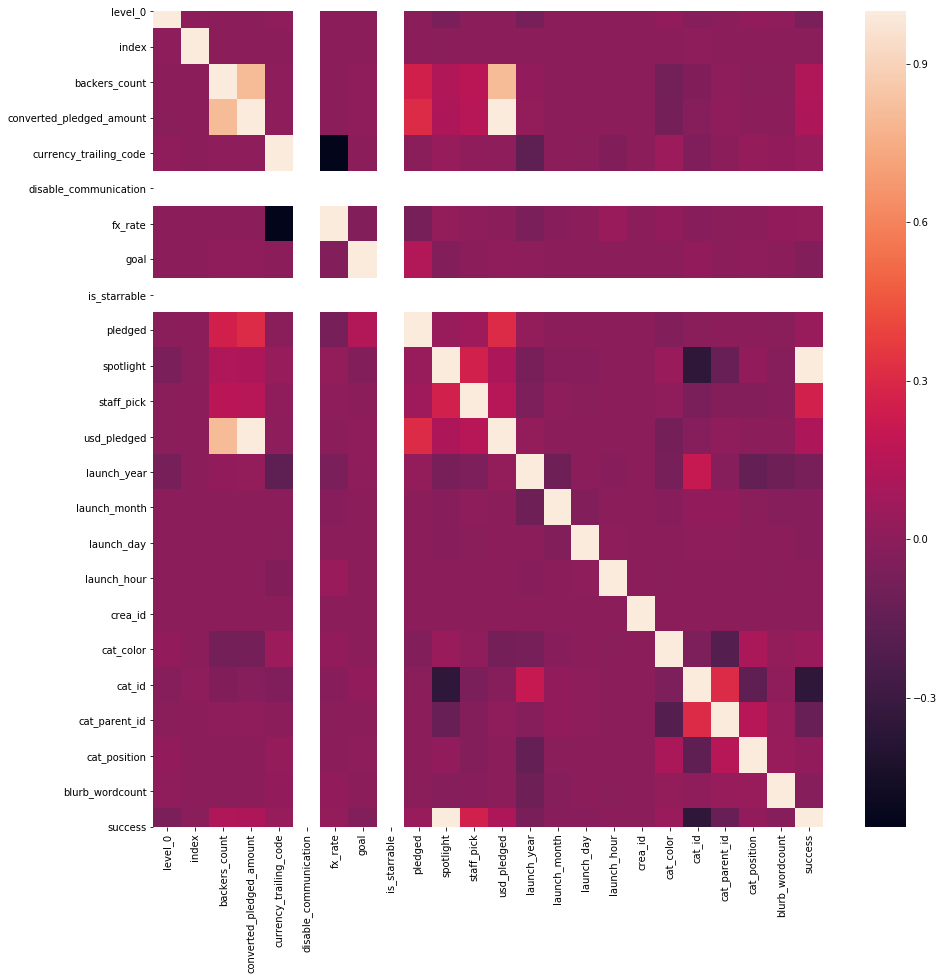

In [0]:
plt.figure(figsize = (15,15))
sns.heatmap(corrm)

In [0]:
df_tot5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168975 entries, 0 to 192657
Data columns (total 47 columns):
level_0                     168975 non-null int64
index                       168975 non-null int64
backers_count               168975 non-null int64
blurb                       168975 non-null object
converted_pledged_amount    168975 non-null int64
country                     168975 non-null category
created_at                  168975 non-null datetime64[ns]
currency                    168975 non-null category
currency_symbol             168975 non-null category
currency_trailing_code      168975 non-null bool
current_currency            168975 non-null category
deadline                    168975 non-null datetime64[ns]
disable_communication       168975 non-null bool
fx_rate                     168975 non-null float64
goal                        168975 non-null float64
id                          168975 non-null category
is_starrable                168975 non-null bool
loca

In [0]:
df_tot5.gender = df_tot5.gender.astype('category')
df_tot5.cat_super = df_tot5.cat_super.astype('category')
df_tot5.cat_parent_id = df_tot5.cat_parent_id.astype('category')
#df_tot5.city = df_tot5.city.astype('category')
df_tot5.gender = df_tot5.gender.astype('category')

In [0]:
np.sort(list(df_tot5.cat_position.unique()))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])

In [0]:
a = 0
for x in df_tot5.columns:
    if x in ['level_0', 'index', 'blurb', 'converted_pledged_amount',\
        'currency', 'currency_symbol', 'currency_trailing_code',\
        'id', 'name', 'slug', 'photo', 'state', 'state_changed_at',\
        'crea_name', 'crea_avatar', 'crea_urls', 'crea_slug',\
        'cat_color', 'cat_urls', 'cat_parent_id', 'cat_id']:
        print(a,x)
    a += 1

0 level_0
1 index
3 blurb
4 converted_pledged_amount
7 currency
8 currency_symbol
9 currency_trailing_code
15 id
18 name
19 photo
21 slug
24 state
25 state_changed_at
32 crea_avatar
34 crea_name
35 crea_slug
36 crea_urls
37 cat_color
38 cat_id
40 cat_parent_id
43 cat_urls


In [0]:
df_tot5[['level_0', 'index', 'blurb', 'converted_pledged_amount',\
        'currency', 'currency_symbol', 'currency_trailing_code',\
        'id', 'name', 'slug', 'photo', 'state', 'state_changed_at',\
        'crea_name', 'crea_avatar', 'crea_urls', 'crea_slug',\
        'cat_color', 'cat_urls', 'cat_parent_id', 'cat_id']]

,level_0,index,blurb,converted_pledged_amount,currency,currency_symbol,currency_trailing_code,id,name,slug,...,state,state_changed_at,crea_name,crea_avatar,crea_urls,crea_slug,cat_color,cat_urls,cat_parent_id,cat_id
0,0,0,2006 was almost 7 years ago.... Can you believ...,802,USD,$,True,287514992,New Final Round Album,new-final-round-album,...,successful,2014-02-08 22:37:26,Daniel,{'thumb': 'https://ksr-ugc.imgix.net/assets/00...,{'web': {'user': 'https://www.kickstarter.com/...,,10878931,{'web': {'discover': 'http://www.kickstarter.c...,14.0,43
1,1,1,An adorable fantasy enamel pin series of princ...,2259,USD,$,True,385129759,Princess Pals Enamel Pin Series,princess-pals-enamel-pin-series,...,successful,2019-03-05 16:00:11,Katherine,{'thumb': 'https://ksr-ugc.imgix.net/assets/02...,{'web': {'user': 'https://www.kickstarter.com/...,freckleddisney,16760235,{'web': {'discover': 'http://www.kickstarter.c...,1.0,54
2,2,2,Helping a community come together to set the s...,29638,USD,$,True,681033598,Their Life Through Their Lens-the Amish and Me...,their-life-through-their-lens-the-amish-and-me...,...,successful,2016-12-01 15:58:52,MelissaThomas,{'thumb': 'https://ksr-ugc.imgix.net/assets/01...,{'web': {'user': 'https://www.kickstarter.com/...,,58341,{'web': {'discover': 'http://www.kickstarter.c...,15.0,280
3,3,3,Every revolution starts from the bottom and we...,49158,EUR,€,False,1031782682,WAO: THE ECO EFFECT SHOES,wao-the-eco-effect-shoes,...,successful,2018-12-08 22:59:00,WAO,{'thumb': 'https://ksr-ugc.imgix.net/assets/02...,{'web': {'user': 'https://www.kickstarter.com/...,wearewao,16752598,{'web': {'discover': 'http://www.kickstarter.c...,9.0,266
4,4,4,Learn to build 10+ Applications in this comple...,549,USD,$,True,904085819,Apple Watch Development Course,apple-watch-development-course,...,failed,2015-04-08 16:36:59,Kalpit Jain,{'thumb': 'https://ksr-ugc.imgix.net/assets/00...,{'web': {'user': 'https://www.kickstarter.com/...,,6526716,{'web': {'discover': 'http://www.kickstarter.c...,16.0,51
5,5,5,'Eclipse' - A 30mm hard enamel pin in jet blac...,2117,GBP,£,False,1140013344,Saluki Totem Enamel Pin,saluki-totem-enamel-pin,...,successful,2018-02-17 11:01:13,Jennifer Hawkyard,{'thumb': 'https://ksr-ugc.imgix.net/assets/00...,{'web': {'user': 'https://www.kickstarter.com/...,jezhawk,16752598,{'web': {'discover': 'http://www.kickstarter.c...,9.0,262
6,6,6,Tao Of Maceo is a professionally printed journ...,886,USD,$,True,1136128624,Quickstarter: Tao Of Maceo,quickstarter-tao-of-maceo,...,successful,2018-08-20 19:00:02,Maceo Paisley,{'thumb': 'https://ksr-ugc.imgix.net/assets/00...,{'web': {'user': 'https://www.kickstarter.com/...,maceopaisley,14867664,{'web': {'discover': 'http://www.kickstarter.c...,18.0,48
7,7,7,Let's build and remix a new Personal Web Theme...,30,USD,$,True,1502040661,#lolnub. Web Theme Park and Story Attraction.,lolnub-web-theme-park-and-story-attraction,...,failed,2014-11-22 18:22:02,Mike Evans,{'thumb': 'https://ksr-ugc.imgix.net/assets/00...,{'web': {'user': 'https://www.kickstarter.com/...,lolnub,6526716,{'web': {'discover': 'http://www.kickstarter.c...,16.0,51
8,8,8,"A limited edition, signed and numbered hand sc...",70,USD,$,True,1163929691,Limited Edition Heroic Fireman Statuette,limited-edition-heroic-fireman-statuette,...,failed,2012-10-06 16:37:31,Michael,{'thumb': 'https://ksr-ugc.imgix.net/assets/00...,{'web': {'user': 'https://www.kickstarter.com/...,,16760235,{'web': {'discover': 'http://www.kickstarter.c...,1.0,25
9,9,9,"Play this hilarious, nonsensical card game for...",1344,USD,$,True,410663165,PRATTLE,prattle,...,failed,2016-07-29 23:57:59,Nathan Hatch,{'thumb': 'https://ksr-ugc.imgix.net/assets/00...,{'web': {'user': 'https://www.kickstarter.com/...,,51627,{'web': {'discover': 'http://www.kickstarter.c...,12.0,273


In [0]:
df_tot6 = df_tot5.drop(['level_0', 'index', 'blurb', 'converted_pledged_amount',\
                        'currency', 'current_currency', 'currency_symbol', 'currency_trailing_code',\
                        'id', 'name', 'slug', 'photo', 'state', 'state_changed_at',\
                        'crea_name', 'crea_avatar', 'crea_urls', 'crea_slug',\
                        'cat_color', 'cat_urls', 'cat_parent_id', 'cat_id', 'pledged', 'spotlight'], axis = 1)

In [0]:
df_tot6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168975 entries, 0 to 192657
Data columns (total 23 columns):
backers_count            168975 non-null int64
country                  168975 non-null category
created_at               168975 non-null datetime64[ns]
deadline                 168975 non-null datetime64[ns]
disable_communication    168975 non-null bool
fx_rate                  168975 non-null float64
goal                     168975 non-null float64
is_starrable             168975 non-null bool
location                 168762 non-null object
staff_pick               168975 non-null bool
usd_pledged              168975 non-null float64
launch_weekday           168975 non-null object
launch_year              168975 non-null int64
launch_month             168975 non-null int64
launch_day               168975 non-null int64
launch_hour              168975 non-null int64
crea_id                  168975 non-null int64
cat_name                 168975 non-null object
cat_position    

In [0]:
len(df_tot6.cat_name.unique())

159

In [0]:
df_tot6b = df_tot6.drop(['location',
 'deadline',
 'created_at',
 'usd_pledged',
 'staff_pick',
 'cat_name',
 'backers_count'], axis=1)

In [0]:
cat_list = ['country', 'launch_weekday', 'cat_super', 'gender']

droplist2 = ['country', 'location', 'launch_weekday', 'cat_name', 'cat_super', 'gender', 'deadline', 'created_at', 'usd_pledged', 'staff_pick', 'backers_count']

droplist3 = []
for x in droplist2:
    if x not in cat_list:
        droplist3.append(x)
        
droplist3

['location',
 'cat_name',
 'deadline',
 'created_at',
 'usd_pledged',
 'staff_pick',
 'backers_count']

In [0]:
#dum = pd.get_dummies(df_tot6.drop(['location', 'deadline', 'created_at', 'success', 'usd_pledged', 'backers_count', 'staff_pick'], axis = 1)[],drop_first = True, prefix = 'cat_')
dum = pd.get_dummies(df_tot6b, columns=cat_list,drop_first = True, prefix = 'dum', )
df_wo_dum = df_tot6b.drop(cat_list, axis = 1)
df_tot7 = pd.concat([dum.drop('success', axis = 1), df_wo_dum], axis=1)
df_tot7 = dum

In [0]:
print(len(df_tot6b.drop(cat_list, axis = 1).columns))
print(len(df_wo_dum.columns))
print(len(dum.columns))
print(len(df_tot7.columns))
print(dum.columns.nunique())
print(df_tot7.columns.nunique())
dum.head()

12
12
55
55
55
55


,disable_communication,fx_rate,goal,is_starrable,launch_year,launch_month,launch_day,launch_hour,crea_id,cat_position,blurb_wordcount,success,dum_AU,dum_BE,dum_CA,dum_CH,dum_DE,dum_DK,dum_ES,dum_FR,dum_GB,dum_HK,dum_IE,dum_IT,dum_JP,dum_LU,dum_MX,dum_NL,dum_NO,dum_NZ,dum_SE,dum_SG,dum_US,dum_Monday,dum_Saturday,dum_Sunday,dum_Thursday,dum_Tuesday,dum_Wednesday,dum_comics,dum_crafts,dum_dance,dum_design,dum_fashion,dum_film & video,dum_food,dum_games,dum_journalism,dum_music,dum_photography,dum_publishing,dum_technology,dum_theater,dum_male,dum_unknown
0,False,1.000000,200.0,False,2013,12,25,22,1495925645,17,26,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,False,1.000000,400.0,False,2019,2,13,16,1175589980,6,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,False,1.000000,27224.0,False,2016,11,1,14,1196856269,5,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,False,1.128433,40000.0,False,2018,10,27,23,1569700626,5,13,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,False,1.000000,1000.0,False,2015,3,9,16,1870845385,11,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [0]:
pd.set_option('display.max_columns', 300)
df_tot7.head()

,disable_communication,fx_rate,goal,is_starrable,launch_year,launch_month,launch_day,launch_hour,crea_id,cat_name,cat_position,blurb_wordcount,success,dum_AU,dum_BE,dum_CA,dum_CH,dum_DE,dum_DK,dum_ES,dum_FR,dum_GB,dum_HK,dum_IE,dum_IT,dum_JP,dum_LU,dum_MX,dum_NL,dum_NO,dum_NZ,dum_SE,dum_SG,dum_US,dum_Monday,dum_Saturday,dum_Sunday,dum_Thursday,dum_Tuesday,dum_Wednesday,dum_comics,dum_crafts,dum_dance,dum_design,dum_fashion,dum_film & video,dum_food,dum_games,dum_journalism,dum_music,dum_photography,dum_publishing,dum_technology,dum_theater,dum_male,dum_unknown,disable_communication,fx_rate,goal,is_starrable,launch_year,launch_month,launch_day,launch_hour,crea_id,cat_name,cat_position,blurb_wordcount,success
0,False,1.000000,200.0,False,2013,12,25,22,1495925645,rock,17,26,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,False,1.000000,200.0,False,2013,12,25,22,1495925645,rock,17,26,1
1,False,1.000000,400.0,False,2019,2,13,16,1175589980,mixed_media,6,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,1.000000,400.0,False,2019,2,13,16,1175589980,mixed_media,6,9,1
2,False,1.000000,27224.0,False,2016,11,1,14,1196856269,photobooks,5,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,False,1.000000,27224.0,False,2016,11,1,14,1196856269,photobooks,5,25,1
3,False,1.128433,40000.0,False,2018,10,27,23,1569700626,footwear,5,13,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,False,1.128433,40000.0,False,2018,10,27,23,1569700626,footwear,5,13,1
4,False,1.000000,1000.0,False,2015,3,9,16,1870845385,software,11,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,False,1.000000,1000.0,False,2015,3,9,16,1870845385,software,11,22,0


In [0]:
X = df_tot7.drop('success', axis = 1).values
y = df_tot7.success.values
test_size = 0.2
random_state = 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = random_state)

In [0]:
treec = DecisionTreeClassifier(max_depth = 30)

In [0]:
treec.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=30,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
y_pred = treec.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,y_pred)

array([[ 9994,  4766],
       [ 4843, 14192]])

In [0]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.68      0.68     14760
           1       0.75      0.75      0.75     19035

    accuracy                           0.72     33795
   macro avg       0.71      0.71      0.71     33795
weighted avg       0.72      0.72      0.72     33795



In [0]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier(max_depth = 50)

In [0]:
rforest.fit(X_train, y_train)
y_pred = rforest.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

/Users/peterniksa/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[11064  3696]
 [ 5107 13928]]
              precision    recall  f1-score   support

           0       0.68      0.75      0.72     14760
           1       0.79      0.73      0.76     19035

    accuracy                           0.74     33795
   macro avg       0.74      0.74      0.74     33795
weighted avg       0.74      0.74      0.74     33795



In [0]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV

In [0]:
cross_val_score(rforest,X,y, cv = 5)

array([0.73162504, 0.73345169, 0.73496079, 0.73596686, 0.74415577])

In [0]:
cross_val_score(treec,X,y, cv = 5)

array([0.77319801, 0.78209794, 0.78227548, 0.79047196, 0.78655974])

In [0]:
parameters = {'max_depth': list(range(31))}

randCV = RandomizedSearchCV(treec, parameters)

In [0]:
randCV.fit(X_train, y_train)
y_pred = randCV.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

/Users/peterniksa/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[[13194  1566]
 [ 5863 13172]]
              precision    recall  f1-score   support

           0       0.69      0.89      0.78     14760
           1       0.89      0.69      0.78     19035

    accuracy                           0.78     33795
   macro avg       0.79      0.79      0.78     33795
weighted avg       0.81      0.78      0.78     33795



In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
logrec = LogisticRegression()
logrec.fit(X_train, y_train)
y_pred = logrec.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(cross_val_score(logrec,X,y, cv = 5))

/Users/peterniksa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 2303 12457]
 [ 1244 17791]]
              precision    recall  f1-score   support

           0       0.65      0.16      0.25     14760
           1       0.59      0.93      0.72     19035

    accuracy                           0.59     33795
   macro avg       0.62      0.55      0.49     33795
weighted avg       0.61      0.59      0.52     33795



/Users/peterniksa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/peterniksa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/peterniksa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/peterniksa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/peterniksa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver 

[0.59542549 0.58050007 0.57984909 0.58248262 0.58181926]


In [0]:
# Prinicipal component analysis
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)




pca = PCA(n_components = None)
pca.fit(scaled_X_train)
#pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
print(pca.explained_variance_ratio_)
print(pca)

[4.07996310e-02 3.91094360e-02 3.23624104e-02 2.95987851e-02
 2.47089368e-02 2.42557553e-02 2.34760836e-02 2.28662638e-02
 2.27713251e-02 2.21257955e-02 2.17395476e-02 2.12854707e-02
 2.10945860e-02 2.10300303e-02 2.09405105e-02 2.06560352e-02
 2.06201890e-02 2.03051689e-02 2.02188351e-02 2.01722472e-02
 1.99844519e-02 1.98714520e-02 1.97872560e-02 1.95643548e-02
 1.94651085e-02 1.94306913e-02 1.93992634e-02 1.93583465e-02
 1.93437937e-02 1.92995599e-02 1.92791023e-02 1.92665919e-02
 1.92371273e-02 1.92112569e-02 1.91775144e-02 1.91286197e-02
 1.90540418e-02 1.89514148e-02 1.88660367e-02 1.85974817e-02
 1.84108930e-02 1.82280127e-02 1.78150310e-02 1.74019806e-02
 1.66287791e-02 1.27694732e-02 1.00815817e-02 6.56071021e-03
 3.39674151e-03 2.18682227e-03 1.04302927e-04 5.16313695e-06
 8.04630853e-33 2.78350610e-34]
PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)


In [0]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)
X_pca = pca.fit_transform(X)

In [0]:
rforest.fit(X_train_pca, y_train)
y_pred = rforest.predict(X_test_pca)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(cross_val_score(logrec,X_pca,y, cv = 5))

[[9540 5220]
 [9059 9976]]
              precision    recall  f1-score   support

           0       0.51      0.65      0.57     14760
           1       0.66      0.52      0.58     19035

    accuracy                           0.58     33795
   macro avg       0.58      0.59      0.58     33795
weighted avg       0.59      0.58      0.58     33795



/Users/peterniksa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/peterniksa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/peterniksa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/peterniksa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/peterniksa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver 

[0.6059297  0.60414262 0.60565172 0.60689451 0.60791857]


In [0]:
ix = df_tot7.corr().abs().sort_values('success', ascending=False).index
df_tot8 = df_tot7.loc[:, ix]
corrm = df_tot8.corr()
#corrm = df_tot7.corr()
plt.figure(figsize = (15,15))
#sns.heatmap(corrm)
corrm.success

success                  1.000000
dum_food                -0.157138
dum_technology          -0.138063
dum_male                -0.107163
dum_publishing           0.095476
dum_comics               0.093427
dum_music                0.092820
dum_journalism          -0.074088
launch_year             -0.069435
dum_dance                0.062754
dum_IT                  -0.058840
dum_US                   0.056896
dum_photography         -0.055725
dum_unknown              0.053092
dum_crafts              -0.049330
dum_DE                  -0.036460
goal                    -0.034549
dum_NL                  -0.032549
dum_MX                  -0.029493
dum_ES                  -0.029131
dum_theater              0.028372
dum_AU                  -0.027666
dum_games                0.027176
dum_Tuesday              0.026586
fx_rate                  0.024497
dum_GB                   0.023013
dum_design               0.022852
cat_position             0.020988
blurb_wordcount         -0.020511
dum_film & vid

<Figure size 1080x1080 with 0 Axes>

In [0]:
df_tot7.columns

Index(['disable_communication', 'fx_rate', 'goal', 'is_starrable',
       'staff_pick', 'launch_year', 'launch_month', 'launch_day',
       'launch_hour', 'crea_id',
       ...
       'is_starrable', 'staff_pick', 'launch_year', 'launch_month',
       'launch_day', 'launch_hour', 'crea_id', 'cat_position',
       'blurb_wordcount', 'success'],
      dtype='object', length=226)

In [0]:
df_tot7['dum_music']

,dum_music,dum_music
0,0,1
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0
